In [221]:
import numpy as np
import pandas as pd
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

In [267]:
#reads the train and test csv
train_data=pd.read_csv("Train_data.csv",encoding='utf-8')
test_data=pd.read_csv("test_data.csv",encoding='utf-8')
print("Train data shape(rows,col)==>",train_data.shape)
print("Test data shape(rows,cols)==>",test_data.shape)


Train data shape(rows,col)==> (125973, 42)
Test data shape(rows,cols)==> (10000, 42)


In [269]:
#concat of train and test data==>datatt
data_tt=pd.concat([train_data,test_data],axis=0)
data_tt.head()
print("concatenated data shape(rows,cols)==>",data_tt.shape)

concatenated data shape(rows,cols)==> (135973, 42)


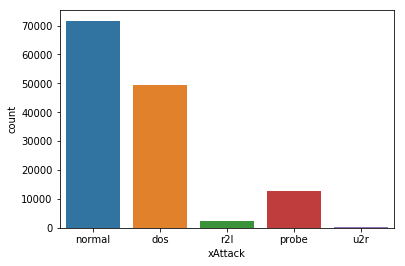

In [270]:
#graphical repr of y-xAttack
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=datatt, x = 'xAttack', label='Count')



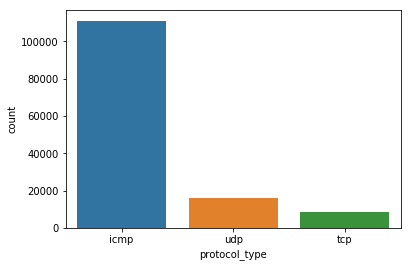

In [276]:
#graphical repr of the type of protocol
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data_tt, x = 'protocol_type', label='Count')

In [274]:
#columns are printed and saved in a variable col
col = data_tt.columns       # .columns gives columns names in data 
print(col)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')


In [275]:
#to find variation od data
data_tt.describe()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,135973.000000,135973.000000,135973.000000,1.359730e+05,1.359730e+05,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000,...,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000
mean,282.887801,32.333794,2.547800,4.271899e+04,1.847135e+04,0.000221,0.021681,0.000147,0.196230,0.002692,...,183.058923,117.417524,0.527458,0.083426,0.147260,0.031628,0.270608,0.265195,0.127471,0.128325
std,2538.078860,16.439942,1.141178,5.650402e+06,3.870581e+06,0.014852,0.247276,0.016271,2.077044,0.059601,...,98.867370,110.941664,0.448571,0.191234,0.308886,0.111069,0.437163,0.438166,0.314868,0.327617
min,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,84.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,25.000000,2.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,66.000000,0.550000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,50.000000,4.000000,2.760000e+02,5.340000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,57715.000000,70.000000,11.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [277]:
#the value in protocol are icmp,udp,tcp they are changed to 0,1,2
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data_tt['protocol_type']=LE.fit_transform(data_tt['protocol_type'])


In [279]:
data_tt.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,0,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,0,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [281]:
# x and y are assigned
y = data_tt.xAttack                    # M or B 
x = data_tt.iloc[:,:-1]

In [282]:
y=pd.DataFrame(y)
x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0,0,50,1,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
6,0,0,50,4,0,0,0,0,0,0,...,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00
7,0,0,50,4,0,0,0,0,0,0,...,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00
8,0,0,52,4,0,0,0,0,0,0,...,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00
9,0,0,50,4,0,0,0,0,0,0,...,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

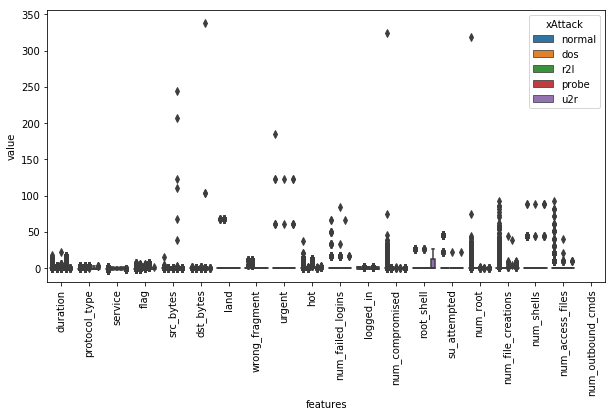

In [283]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:20]],axis=1)
data = pd.melt(data,id_vars="xAttack",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,5))
sns.boxplot(x="features", y="value", hue="xAttack", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

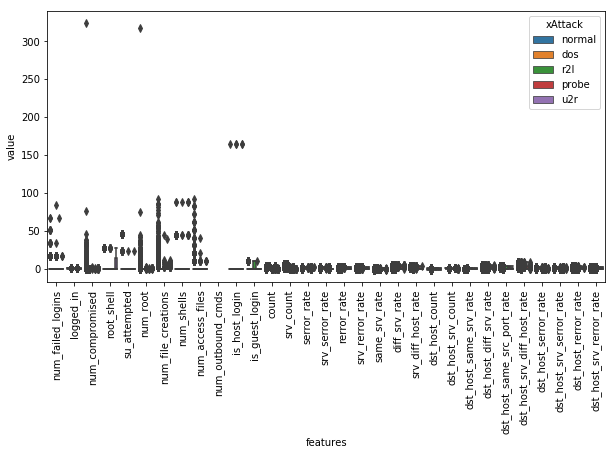

In [284]:
data = pd.concat([y,data_n_2.iloc[:,10:]],axis=1)
data = pd.melt(data,id_vars="xAttack",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,5))
sns.boxplot(x="features", y="value", hue="xAttack", data=data)
plt.xticks(rotation=90)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.012979,0.095070,0.142673,0.069884,0.034496,-0.001656,-0.009772,0.002976,0.000706,...,0.050462,-0.104147,-0.110378,0.239987,0.215624,-0.026464,-0.059866,-0.058805,0.158950,0.180848
protocol_type,0.012979,1.000000,-0.193855,-0.216514,-0.003399,-0.002146,-0.006700,0.212407,-0.004077,-0.042612,...,0.091722,0.124530,0.175700,0.065459,0.351873,0.078526,-0.274434,-0.272988,-0.134067,-0.176670
service,0.095070,-0.193855,1.000000,0.217825,-0.001737,0.003388,-0.010784,0.080441,0.013619,-0.063440,...,0.197471,-0.399198,-0.446776,0.278635,-0.114172,-0.156544,0.269379,0.266893,0.169781,0.166034
flag,0.142673,-0.216514,0.217825,1.000000,0.001858,0.008457,0.018904,-0.042089,-0.004340,-0.038972,...,0.290769,-0.415949,-0.467164,0.044254,-0.093323,-0.156932,0.761672,0.772836,-0.269427,-0.250559
src_bytes,0.069884,-0.003399,-0.001737,0.001858,1.000000,0.000206,-0.000112,-0.000661,-0.000066,0.000327,...,-0.005708,-0.006715,-0.006394,0.000849,0.000518,-0.001532,-0.004227,-0.003152,-0.001593,0.011484


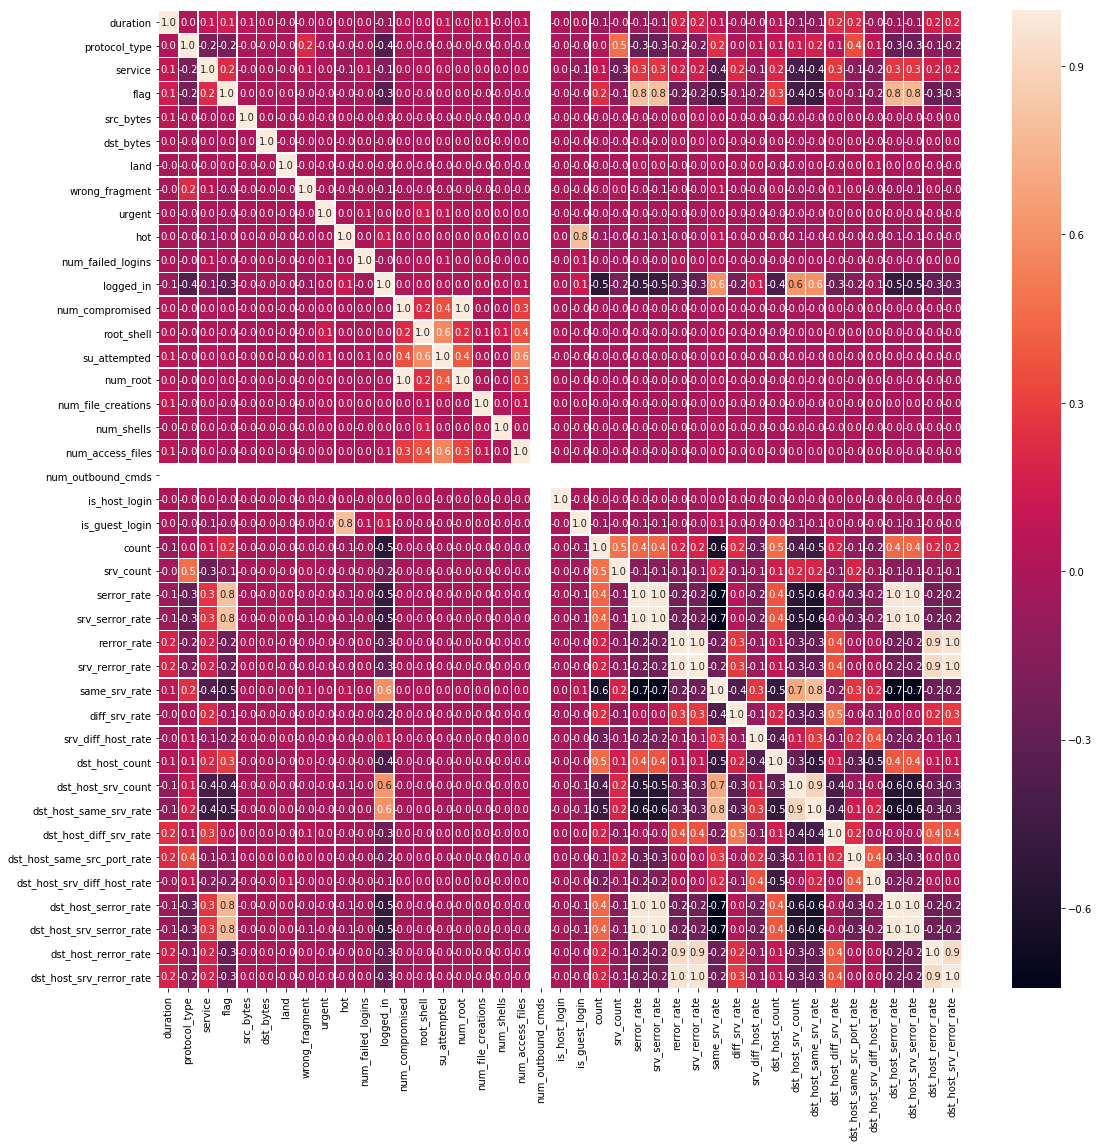

In [285]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
corr = x.corr()
corr.head()

In [286]:
#num_compromised-num_root
#dns_hot_serror_rate==serror_rate
#dst_host_srv_rerror_rate=rerror_rate=srv_rerror_rate=dst_host_serror_rate=dst_host_srv_rerror_rate
#dst_host_serror_rate=flag
#num_root=num_compromse

In [287]:
#removal of correlated columns-feature reduction--feature >=0.8 correlation are removed
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(x.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False

In [288]:
#filtered columns are the assigned to variable selected_columns

selected_columns = x.columns[columns]
print("the number of  filtered columns from correlation matrix are",selected_columns.shape)

the filtered columns from correlation matrix are (32,)


In [290]:
print("the filtered columns are =================>",selected_columns)

the filtered columns are =================> Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate'],
      dtype='object')


In [291]:
#now x is reassigned to the filtered columns
x = x[selected_columns]

In [292]:
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_count,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,0,20,2,491,0,0,0,0,0,...,2,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00
1,0,2,45,2,146,0,0,0,0,0,...,1,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00
2,0,0,50,4,0,0,0,0,0,0,...,6,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,5,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04
4,0,0,25,2,199,420,0,0,0,0,...,32,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00


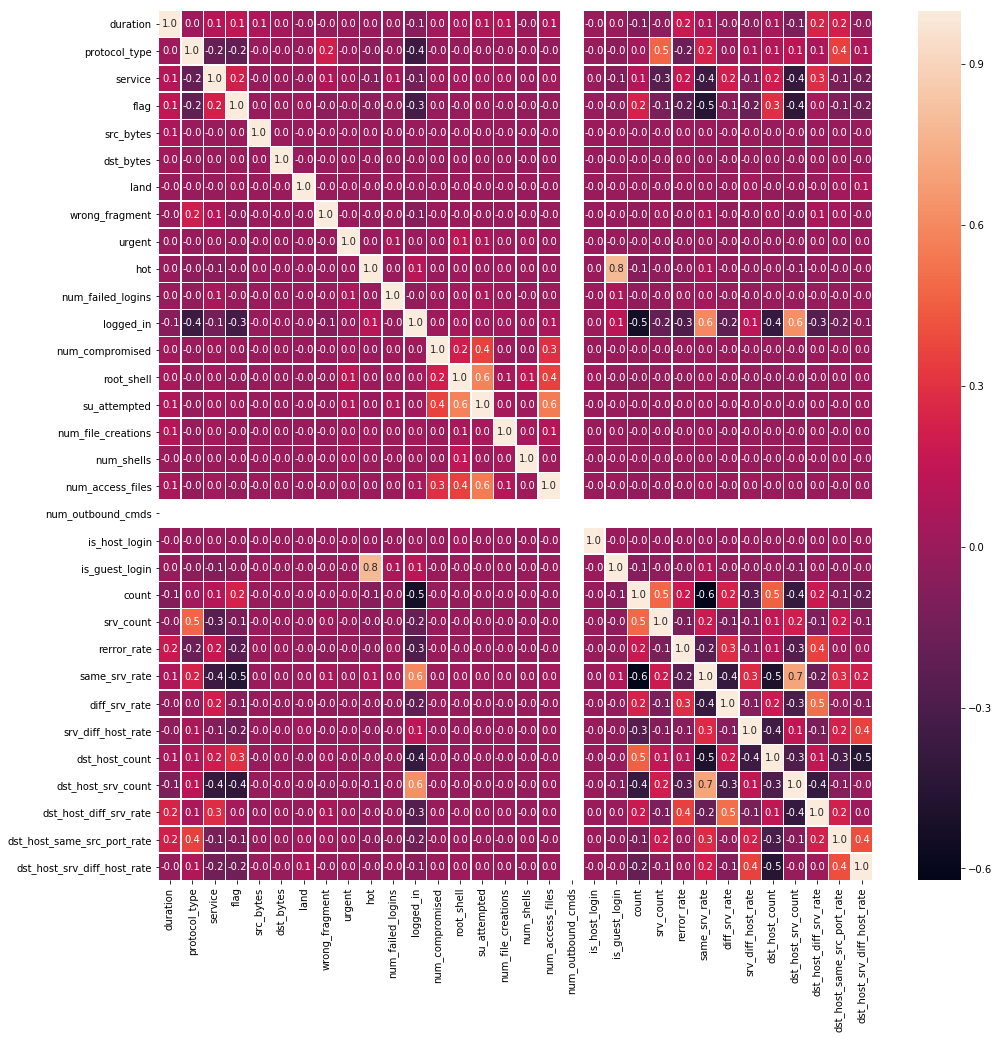

In [293]:
#correlation map-again it is plotted for the purpose of rechecking columns
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

C:\Users\anjali\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\anjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Accuracy is:  0.995979603843891


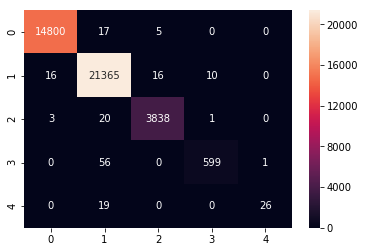

In [294]:
#random forest model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)


#getting the accuracy score
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [295]:
#selecting the top 20 features 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



Score list: [9.24597427e+07 8.95179348e+03 6.85764578e+04 1.41066387e+04
 1.71997414e+10 1.78324601e+10 1.66450841e+01 3.34558146e+03
 1.36439460e+03 1.20160261e+05 7.63975247e+03 2.78366328e+04
 2.29294065e+04 5.08177655e+03 9.33907612e+01 3.46033281e+03
 2.93159109e+03 3.58182050e+02            nan 1.07045005e+03
 9.73217398e+03 5.81705393e+06 1.69649469e+05 1.08393322e+04
 1.80987059e+04 7.72321255e+03 7.39487967e+03 1.12849372e+06
 5.04246887e+06 1.23312141e+04 1.63323615e+04 7.05486029e+03]
Feature list: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv

In [296]:
# find best scored 20 features
select_feature = SelectKBest(chi2, k=16).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [9.24597427e+07 8.95179348e+03 6.85764578e+04 1.41066387e+04
 1.71997414e+10 1.78324601e+10 1.66450841e+01 3.34558146e+03
 1.36439460e+03 1.20160261e+05 7.63975247e+03 2.78366328e+04
 2.29294065e+04 5.08177655e+03 9.33907612e+01 3.46033281e+03
 2.93159109e+03 3.58182050e+02            nan 1.07045005e+03
 9.73217398e+03 5.81705393e+06 1.69649469e+05 1.08393322e+04
 1.80987059e+04 7.72321255e+03 7.39487967e+03 1.12849372e+06
 5.04246887e+06 1.23312141e+04 1.63323615e+04 7.05486029e+03]
Feature list: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv

C:\Users\anjali\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\anjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy is:  0.995906060011767


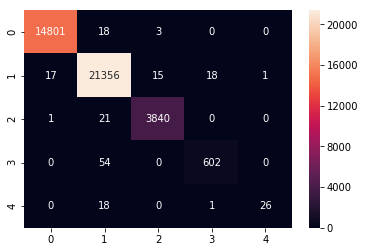

In [297]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")